*The SIR model is an epidemiological model that computes the theoretical number of people infected with a contagious illness in a closed population over time. This model basically classifies people into three compartments: Susceptible (S), Infected (I) and Recovered (R).There are multiple variants of SIR, which are slight modifications of the basic SIR model to include additional informations such as  those exposed (E), dead (D) and babies with maternally derived immunity (M). The COVID-19 flu virus can be modelled with SEIRD model. All those who are exposed to COVID-19 do not spread disease once they contract the virus. It takes a certain amount of time for the human body to respond to infestation and to show symptoms. Those exposed to the virus won't be able to transmit the infection to anyone during this period (called incubation period). The D compartment is included to add dynamics to the model and to show the itensity of infection, though D can be included with the R compartment.*

SEIRD model:
$$\frac{dS}{dt}=-\beta*\frac{S(t)*I(t)}{N}$$  
$$\frac{dE}{dt}=\beta*\frac{S(t)*I(t)}{N}-\delta*E(t)$$    
$$\frac{dI}{dt}=\alpha*E(t)-\gamma*I(t)-\mu*I(t)$$  
$$\frac{dR}{dt}=\gamma*I(t)$$   
$$\frac{dD}{dt}=\mu*I(t)$$
FDM is used to discretize the equations.  
$$\frac{S^{n+1}-S^n}{\Delta t}=-\beta*I^n*\frac{S^n}{N}$$  
$$\frac{E^{n+1}-E^n}{\Delta t}=\beta*I^n*\frac{S^n}{N}-\delta*E^n$$  
$$\frac{I^{n+1}-I^n}{\Delta t}=\delta*E^n-\gamma*I^n-\mu*I^n$$  
$$\frac{R^{n+1}-R^n}{\Delta t}=\gamma*I^n$$  
$$\frac{D^{n+1}-D^n}{\Delta t}=\mu*I^n$$  
$\delta$ is the inverse of average incubation period  
$\gamma$ is the inverse of average recovery period
$\beta$ is average number of contact per person per time multiplied by probability of disease transmission.  
Also, $\beta$=$R_0*\gamma$, where $R_0$ is the basic reproduction number  
$R_0$ is shown as a function of time below. 
The values of $\gamma$, $\delta$ and $\mu$ are chosen based on global average of COVID-19

0.026549332703391163


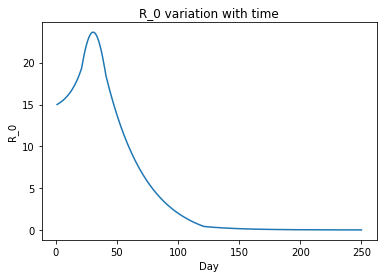

In [43]:
T=250
x=np.zeros(T)
for i in range(0,T):
    if i<=20:
        x[i]=14+np.exp(i/12)
    elif i>20 and i<=40:
        x[i]=x[i-1]+np.sin(i*np.pi/30)
    elif i>40 and i<=120:
        x[i]=x[i-1]-2*np.exp(-1.5*i/50)
    else:
        x[i]=x[i-1]-np.exp(-1.05*i/30)
T1=np.linspace(1,T,T)
p.plot(T1,x)
p.xlabel('Day')
p.ylabel('R_0')
p.title('R_0 variation with time')
print(min(x))

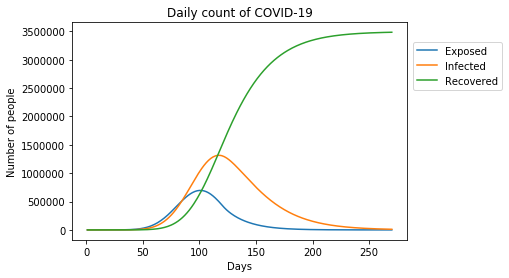

Total number of people dead=292770.0
Total number of people infected/exposed=3789454.0
Total number of people recovered=3485386.0
3778156.0


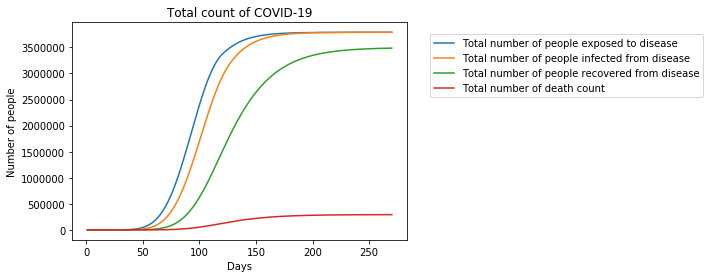

In [21]:
import numpy as np
import matplotlib.pyplot as p
N,S0,I0,R0,E0,D0=7590000000,7589999980,1,0,14,0 #initial conditions
#basic reproduction number
D1,D2=28,10
g=1/D1 #gamma
d=1/D2 #delta
m=0.003 #mu
dt,T=1,270
S,I,R,E=np.zeros(T),np.zeros(T),np.zeros(T),np.zeros(T)
D=np.zeros(T)
N1=np.zeros(T)
I1,E1=np.zeros(T),np.zeros(T)
S[0]=S0
R[0]=R0
I[0],I1[0]=I0,I0
E[0],E1[0]=E0,E0
D[0]=D0
N1[0]=S[0]+E[0]+I[0]+R[0]+D[0]
r=np.zeros(T)
r[0]=14
for t in range(1,T):
    if t<=20:
        r[t]=14+np.exp(t/12)
    elif t>20 and t<=40:
        r[t]=r[t-1]+np.sin(t*np.pi/30)
    elif t>40 and t<=120:
        r[t]=r[t-1]-2*np.exp(-1.5*t/50)
    elif t>120:
        r[t]=r[t-1]-np.exp(-1.05*t/30)
    b=g*r[t] #beta
    S[t]=S[t-1]-round(dt*b*S[t-1]*I[t-1]/N)
    E[t]=E[t-1]+round(dt*b*S[t-1]*I[t-1]/N - dt*d*E[t-1])
    E1[t]=E1[t-1]+round(dt*b*S[t-1]*I[t-1]/N)
    I[t]=I[t-1] + round(dt*d*E[t-1] - dt*g*I[t-1]- dt*m*I[t-1])
    I1[t]=I1[t-1]+round(dt*d*E[t-1])
    R[t]=R[t-1]+round(dt*g*I[t-1])
    D[t]=D[t-1]+round(dt*m*I[t-1])
TT=np.linspace(1,T,T)
#p.plot(TT,S,label='Susceptible')
p.plot(TT,E,label='Exposed')
p.plot(TT,I,label='Infected')
p.plot(TT,R,label='Recovered')
p.legend(loc='center right',bbox_to_anchor=(1.3,0.8))
p.xlabel('Days')
p.ylabel('Number of people')
p.title('Daily count of COVID-19')
p.show()
p.plot(TT,E1,label='Total number of people exposed to disease')
p.plot(TT,I1,label='Total number of people infected from disease')
p.plot(TT,R,label='Total number of people recovered from disease')
p.plot(TT,D,label='Total number of death count')
#p.plot(TT,N1)
p.legend(loc='center right',bbox_to_anchor=(1.9,0.8))
p.xlabel('Days')
p.ylabel('Number of people')
p.title('Total count of COVID-19')
print('Total number of people dead={0}'.format((D[t])))
print('Total number of people infected/exposed={0}'.format((I1[T-1])))
print('Total number of people recovered={0}'.format((R[T-1])))

***The daily count of COVID-19*** shows active cases everyday and ***Total count of COVID-19*** shows the overall count of each compartment. Total population (N) was based on current world population. 

*Though the SEIRD model tried to capture the dynamics of the infection, there are a few shortcomings of the model and in the way it was implemented here*
1. *The SEIRD model neither takes into account of the spatial variation of the infection nor the first known location of the disease.*

2. *This model assumes that all the people have the same level of immunity and ignores any medical conditions of the affected population. This has its impact on the mortality rate of the disease. It also ignores the gender of those infected.*

3. *There are no evidence to show that people develop immunity once having recovered from the infection and thus it was not taken into account in modelling the infection*

4. *The model ignores the possibility of super spreaders, multiple strains of the virus and the possibility of super infection.*

5. *The basic reproduction number ($R_0$) was considered to be a function of time alone. Though the primary reason for this is to justify the ignorance of people of a new kind of infection, it totally ignores the population density of the geographic location. In other words, population density is chosen to be constant. . The variation also is a intuitive one, considering the actions that would be taken by the governments and health advisory bodies such as lockdowns. The same explanation can be extended to constants such as $\gamma$, $\mu$ and $\delta$*